In [1]:

# Autoencoder-based Precision Recovery

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import zlib




In [2]:

# 1. Generate synthetic scientific data

np.random.seed(42)
original_data = np.random.rand(1000).astype(np.float32)



Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4010
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2491 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1518
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0915 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0514 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0291 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0174 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0098 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032 
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 16

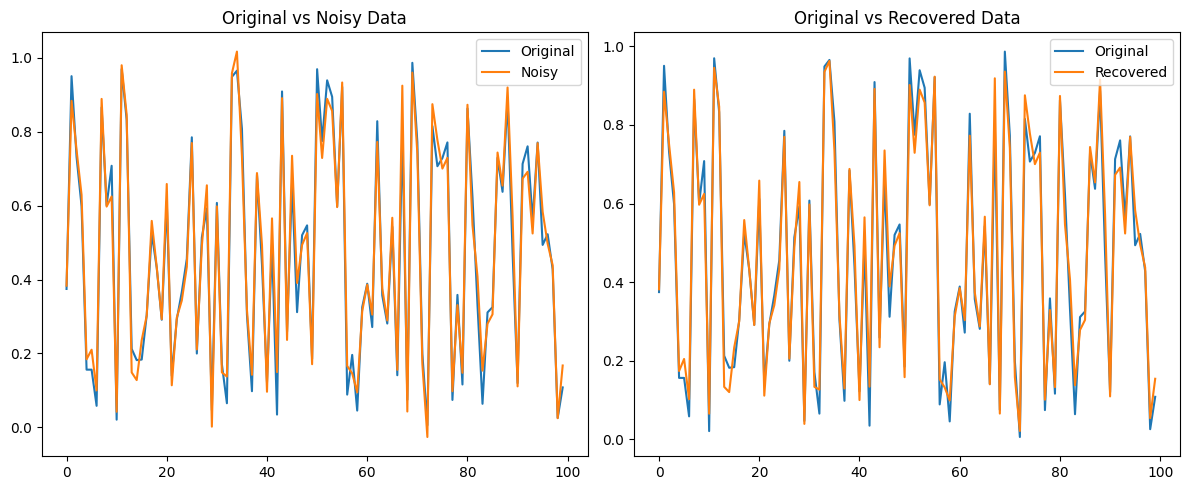

In [4]:


# Compression + Decompression

compressed = zlib.compress(original_data.tobytes())
decompressed = np.frombuffer(
    zlib.decompress(compressed),
    dtype=np.float32
)


decompressed = decompressed[:len(original_data)]

noise = np.random.normal(0, 0.05, size=original_data.shape)
noisy_data = decompressed + noise

# Reshape for neural network
X_train = noisy_data.reshape(-1, 1)
y_train = original_data.reshape(-1, 1)


#  Build Autoencoder
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)
decoded = Dense(1, activation='linear')(encoded)

autoencoder = Model(input_layer, decoded)

autoencoder.compile(
    optimizer='adam',
    loss='mse'
)

#  Train model

autoencoder.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    verbose=1
)


#  Recover data

recovered_data = autoencoder.predict(X_train)


#  Evaluation

mse = np.mean((y_train - recovered_data) ** 2)
print("\nFinal Mean Squared Error (MSE):", mse)


#  Visualization

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(y_train[:100], label='Original')
plt.plot(X_train[:100], label='Noisy')
plt.title("Original vs Noisy Data")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_train[:100], label='Original')
plt.plot(recovered_data[:100], label='Recovered')
plt.title("Original vs Recovered Data")
plt.legend()

plt.tight_layout()
plt.show()